In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
def load_train_dataset():
    df = pd.read_csv('csv_result-KDDTrain+.csv')
    df_test = pd.read_csv('csv_result-KDDTest+.csv')
    
    data_set = pd.concat([df,df_test], axis=0,sort=False)
    
    data_set.drop(['num_outbound_cmds',
          'is_host_login',
          'urgent',
          'id'], axis = 'columns' , inplace = True)
    
    data_set['class'] = data_set['class'].map( {'normal':0, 'anomaly':1} )
    
    limit = data_set.shape[1]-1
    
    X = data_set.iloc[:,0:limit]
    Y = data_set.iloc[:,limit]
    
    return X, Y, data_set

X, Y, data_set = load_train_dataset()

In [3]:
data_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,tcp,http,SF,54540,8314,0,0,2,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [3]:
train_X, test_X , train_Y , test_Y = train_test_split(X, Y, test_size=0.151794,shuffle=False)

print('Training X :',train_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (125973, 38)
Test_X : (22544, 38)
Training_Y : (125973,)
Test_Y : (22544,)


In [4]:
train_X, val_X , train_Y , val_Y = train_test_split(train_X,train_Y, test_size=0.065,shuffle=False)

print('Training X   :',train_X.shape)
print('Validation X :',val_X.shape)
print('Test_X       :',test_X.shape)
print('Training_Y   :',train_Y.shape)
print('Validation Y :',val_Y.shape)
print('Test_Y       :',test_Y.shape)

Training X   : (117784, 38)
Validation X : (8189, 38)
Test_X       : (22544, 38)
Training_Y   : (117784,)
Validation Y : (8189,)
Test_Y       : (22544,)


In [5]:
categorical_cols = ['protocol_type','flag','service']
scale_cols = ['src_bytes','dst_bytes','wrong_fragment','duration','num_compromised','num_root',
                        'hot','num_file_creations','count','srv_count','dst_host_count','dst_host_srv_count']

In [6]:
col_trans = make_column_transformer(
    
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    (MinMaxScaler(feature_range = (-1,1)), scale_cols),
    remainder='passthrough'
)

In [7]:
model = SVC(C= 20, gamma= 0.5)
model_poly = SVC(C= 7, kernel= 'poly',degree=3)
model_linear = SVC(C= 10, kernel= 'linear')

## RBF Kernel Pipeline

In [8]:
pipe_rbf = Pipeline([
    ('col_trans',col_trans),
    ('classifier_rbf',model),])

pipe_rbf.fit(train_X,train_Y)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'flag',
                                                   'service']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['src_bytes', 'dst_bytes',
                                                   'wrong_fragment', 'duration',
                                                   'num_compromised',
                                                   'num_root', 'hot',
                                                   'num_file_creations',
           

In [9]:
train_acc = pipe_rbf.score(train_X,train_Y)
cv_acc = pipe_rbf.score(val_X,val_Y)
test_predictions = pipe_rbf.predict(test_X)

print('Train Accuracy = '+str(train_acc * 100)+' %')
print('Cross Validation Accuracy = '+str(cv_acc * 100)+' %')
print('Accuracy Test = '+ str(accuracy_score(test_Y, test_predictions)*100)+' %')

Train Accuracy = 99.75718263940773 %
Cross Validation Accuracy = 99.76798143851508 %
Accuracy Test = 81.888750887154 %


## Poly Kernel Pipeline

In [10]:
pipe_poly = Pipeline([
    ('col_trans',col_trans),
    ('classifier_poly',model_poly)])

pipe_poly.fit(train_X,train_Y)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'flag',
                                                   'service']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['src_bytes', 'dst_bytes',
                                                   'wrong_fragment', 'duration',
                                                   'num_compromised',
                                                   'num_root', 'hot',
                                                   'num_file_creations',
           

In [11]:
train_acc_poly = pipe_poly.score(train_X,train_Y)
cv_predictions_acc_poly = pipe_poly.score(val_X,val_Y)
test_predictions_poly = pipe_poly.predict(test_X)

print('Train Accuracy = '+str(train_acc_poly * 100)+' %')
print('Cross Validation Accuracy = '+str(cv_predictions_acc_poly * 100)+' %')
print('Accuracy Test = '+ str(accuracy_score(test_Y, test_predictions_poly)*100)+' %')

Train Accuracy = 99.43625619778578 %
Cross Validation Accuracy = 99.45048235437783 %
Accuracy Test = 77.3553938963804 %


## Linear Kernel Pipeline

In [12]:
pipe_linear = Pipeline([
    ('col_trans',col_trans),
    ('classifier_linear',model_linear),])

pipe_linear.fit(train_X,train_Y)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'flag',
                                                   'service']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['src_bytes', 'dst_bytes',
                                                   'wrong_fragment', 'duration',
                                                   'num_compromised',
                                                   'num_root', 'hot',
                                                   'num_file_creations',
           

In [13]:
train_acc_linear = pipe_linear.score(train_X,train_Y)
cv_predictions_acc_linear = pipe_linear.score(val_X,val_Y)
test_predictions_linear = pipe_linear.predict(test_X)

print('Train Accuracy = '+str(train_acc_linear * 100)+' %')
print('Cross Validation Accuracy = '+str(cv_predictions_acc_linear * 100)+' %')
print('Accuracy Test = '+ str(accuracy_score(test_Y, test_predictions_linear)*100)+' %')

Train Accuracy = 97.6694627453644 %
Cross Validation Accuracy = 97.4477958236659 %
Accuracy Test = 75.66980127750178 %


In [14]:
pipe_rbf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'col_trans', 'classifier_rbf', 'col_trans__n_jobs', 'col_trans__remainder', 'col_trans__sparse_threshold', 'col_trans__transformer_weights', 'col_trans__transformers', 'col_trans__verbose', 'col_trans__onehotencoder', 'col_trans__minmaxscaler', 'col_trans__onehotencoder__categories', 'col_trans__onehotencoder__drop', 'col_trans__onehotencoder__dtype', 'col_trans__onehotencoder__handle_unknown', 'col_trans__onehotencoder__sparse', 'col_trans__minmaxscaler__copy', 'col_trans__minmaxscaler__feature_range', 'classifier_rbf__C', 'classifier_rbf__break_ties', 'classifier_rbf__cache_size', 'classifier_rbf__class_weight', 'classifier_rbf__coef0', 'classifier_rbf__decision_function_shape', 'classifier_rbf__degree', 'classifier_rbf__gamma', 'classifier_rbf__kernel', 'classifier_rbf__max_iter', 'classifier_rbf__probability', 'classifier_rbf__random_state', 'classifier_rbf__shrinking', 'classifier_rbf__tol', 'classifier_rbf__verbose'])

In [15]:
param_grid = [
    {'classifier__gamma' : [0.45,0.5,0.51,0.52,0.53,0.54,0.55],
     'classifier__C' : [15,16,17,18,19,20,21,22,23,24,25]
    },
]

optimal_params = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    scoring ='accuracy',
    verbose = 0
)

optimal_params.fit(val_X,val_Y)
print(optimal_params.best_params_)

NameError: name 'pipe' is not defined

In [16]:
predictions = [test_predictions,test_predictions_poly,test_predictions_linear]
kernel_names = ['RBF','Poly','Linear']

def plot_cm(labels, predictions,kernel_names, p=0.85):
    fig, axs = plt.subplots(nrows = 1,ncols = 3, figsize=(20, 5))
    for i in range(0,3): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p)
        sns.heatmap(cm, annot=True, fmt="d",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        axs[i].text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=18)
        axs[i].text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=18)
        axs[i].text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=18)
        axs[i].text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=18)

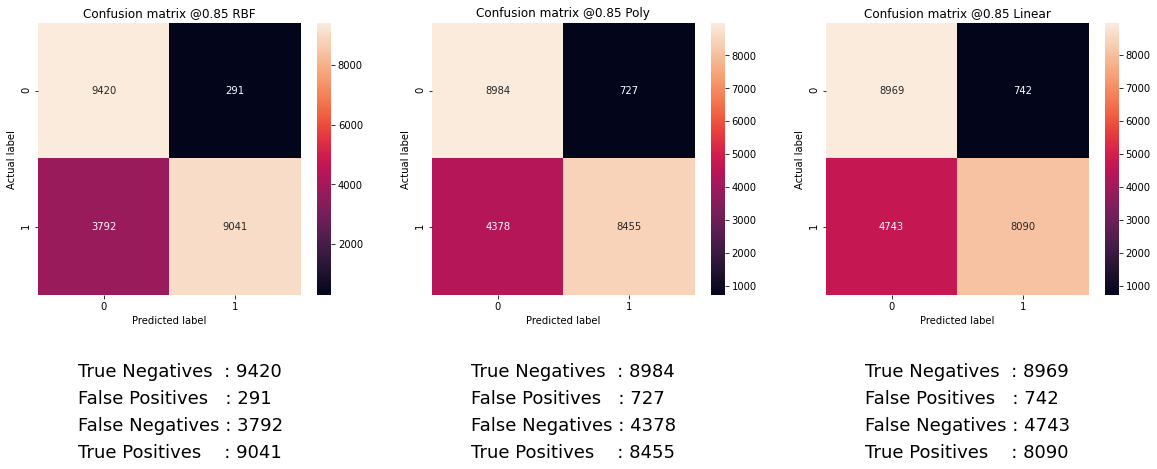

In [17]:
plot_cm(test_Y, predictions,kernel_names)

In [18]:
print(classification_report(test_Y, test_predictions))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      9711
           1       0.97      0.70      0.82     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



In [19]:
result = pd.DataFrame(col_trans.fit_transform(train_X))
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(result)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principal_Y = pd.DataFrame(train_Y)
principal_Y ['class'] = principal_Y ['class'].map( {0:'normal', 1:'anomaly'} )
finalDf = pd.concat([principalDf, principal_Y], axis = 1)

In [20]:
principal_Y

,class
0,normal
1,normal
2,anomaly
3,normal
4,normal
...,...
117779,normal
117780,anomaly
117781,anomaly
117782,anomaly


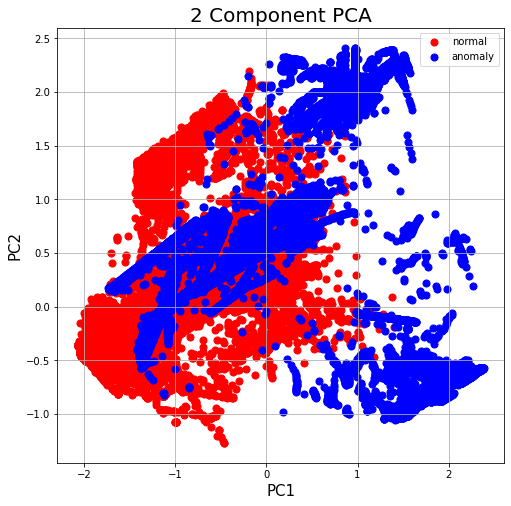

In [21]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['normal', 'anomaly']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                  finalDf.loc[indicesToKeep, 'PC2'],  
                  c = color, 
                  s = 50)
ax.legend(targets)
ax.grid()